# CS 363M Machine Learning Project

## Coders/Writers:
-   Carlos Olvera (cao2546)
-   Ariel Zolton
-   Patricio Hernandez
-   Akshay Pradeep (ap55352)


## Background Information

In this project, we want to predict the milk yield of dairy cows based on various characteristics such as age, weight, feed type, vaccination status, weather conditions, and other attributes. This is an interesting problem because it could be used to optimize feeding and grazing strategies, improve resource planning and management, forecast financial outcomes, monitor animal health status, and enable data-driven decisions for more sustainable farm operations.

To do this, we are using data from a dataset containing 250,000 dairy cow records. Our dataset includes information on each animal's biological characteristics, nutritional factors, health status, and environmental conditions during the recorded milking period.

We want to use this data to predict the milk yield (in liters) for each cow. We will use information such as the cow's age, weight, feed intake, water consumption, weather conditions, and other attributes to predict this. This ML problem is especially interesting, as the accurate prediction of milk yield can significantly impact farm productivity and animal welfare. The challenge involves working with a large-scale real-world dataset and building models that generalize well to unseen data, avoiding overfitting while capturing the complex relationships between various factors and milk production.

## Preparations:

In [1]:
### Import packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spstats
import seaborn as sns
import sklearn as sk

## Cleaning

In [3]:
# Load the training data
train_data = pd.read_csv('cattle_data_train.csv')

# Print shape to see dimensions
print("Shape: ", train_data.shape)

# Display first few rows
train_data.head()

Shape:  (210000, 36)


,Cattle_ID,Breed,Climate_Zone,Management_System,Age_Months,Weight_kg,Parity,Lactation_Stage,Days_in_Milk,Feed_Type,...,BVD_Vaccine,Rabies_Vaccine,Previous_Week_Avg_Yield,Body_Condition_Score,Milking_Interval_hrs,Date,Farm_ID,Feed_Quantity_lb,Mastitis,Milk_Yield_L
0,CATTLE_133713,Holstein,Tropical,Intensive,114,544.8,4,Mid,62,Concentrates,...,0,1,6.31,3.0,12,2024-01-15,FARM_0301,36.8235,1,12.192634
1,CATTLE_027003,Holstein,Arid,Mixed,136,298.9,4,Mid,213,Crop_Residues,...,0,0,17.16,4.0,12,2023-10-31,FARM_0219,NaN,0,14.717031
2,CATTLE_122459,Holstein,Tropical,Semi_Intensive,64,336.6,4,Late,16,Hay,...,1,0,4.07,3.5,12,2024-05-20,FARM_0802,16.0965,0,14.006142
3,CATTLE_213419,Jersey,Mediterranean,Intensive,58,370.5,1,Early,339,Crop_Residues,...,0,0,10.23,3.0,24,2024-07-22,FARM_0034,40.7925,0,24.324325
4,CATTLE_106260,Guernsey,Subtropical,Intensive,84,641.5,6,Early,125,Mixed_Feed,...,1,1,20.68,3.0,12,2023-01-03,FARM_0695,33.7365,1,12.023074


One notable feature of this dataset is the diversity of variables captured - we have biological factors (age, weight, parity), nutritional information (feed type, feed quantity, water intake), behavioral metrics (walking distance, grazing duration, rumination time), environmental conditions (temperature, humidity, climate zone), and health indicators (vaccination status, body condition score, mastitis presence). Looking at the data structure, we can see that some variables are categorical (like breed, management system, lactation stage) while others are continuous numerical measurements.

Another important observation is that the dataset includes the Previous_Week_Avg_Yield feature, which represents the average milk yield from the previous week. This temporal information could be highly predictive of current milk yield, as milk production tends to follow patterns over time. We'll need to carefully handle both categorical and numerical features, check for missing values or inconsistencies, and explore correlations between variables to build a robust predictive model that can accurately forecast milk yield for dairy cows across different farms and conditions.

In [4]:
# Load the training data
train_data = pd.read_csv("cattle_data_train.csv")

# Print shape to see dimensions
print("Shape of the data: ", train_data.shape)

# Get number of rows and columns
num_rows = train_data.shape[0]
num_cols = train_data.shape[1]

# Figure out some basic statistics
num_cows = train_data['Cattle_ID'].nunique()
print("This data represents", num_cows, "unique cows")

# Calculate average milk yield
avg_milk_yield = train_data['Milk_Yield_L'].mean()
print("This means there was an average", round(avg_milk_yield, 2), "liters of milk per cow")


Shape of the data:  (210000, 36)
This data represents 209966 unique cows
This means there was an average 15.59 liters of milk per cow


Now we want to take a more in-depth look at all of our features and use both logic and analytical methods to identify features which are not useful and then remove them as part of our feature engineering step. For this purpose, it is crucially important to understand what exactly the 28 given features are exactly.

Here are the features and their meanings:

<details>
<summary>Features/Attributes</summary>

**Identification**
- **Cattle_ID**: Unique identifier for each animal
- **Farm_ID**: Unique identifier for the farm
- **Date**: Date of the record

**Biological Characteristics**
- **Breed**: Breed of the animal
- **Age_Months**: Age of the cow in months
- **Weight_kg**: Weight of the cow in kilograms
- **Parity**: Number of times the cow has birthed a calf
- **Lactation_Stage**: Stage of lactation (Early, Mid, Late)
- **Days_in_Milk**: Days since the cow started lactation
- **Body_Condition_Score**: Cow's body condition on a numeric scale

**Nutritional Factors**
- **Feed_Type**: Type of feed provided
- **Feed_Quantity_kg**: Amount of feed in kilograms
- **Feed_Quantity_lb**: Amount of feed in pounds
- **Feeding_Frequency**: Number of feedings per day
- **Water_Intake_L**: Daily water consumption in liters

**Activity Metrics**
- **Walking_Distance_km**: Distance walked per day in kilometers
- **Grazing_Duration_hrs**: Hours spent grazing per day
- **Rumination_Time_hrs**: Hours spent chewing cud per day
- **Resting_Hours**: Hours spent resting per day

**Environmental Factors**
- **Climate_Zone**: Climate region of the farm
- **Ambient_Temperature_C**: Environmental temperature in °C
- **Humidity_percent**: Relative humidity percentage

**Farm Management**
- **Management_System**: Type of farm management system used at the farm
- **Housing_Score**: Quality or condition score of housing/facility
- **Milking_Interval_hrs**: Hours between milking sessions

**Health Indicators**
- **[Disease]_Vaccine**: Indicates whether the cow has received vaccination for a specific disease
- **Mastitis**: Presence or absence of mastitis (inflammation of the cow's udder tissue)

**Historical Data**
- **Previous_Week_Avg_Yield**: Average milk yield last week in liters

**Target Variable**
- **Milk_Yield_L**: The total volume of milk produced by the cow in liters during the recorded milking period; this is the target variable to be predicted.

# Check for missing

In [5]:
# Check for missing values
print("="*50)
print("MISSING VALUES ANALYSIS")
print("="*50)
missing = train_data.isnull().sum()
missing_pct = (train_data.isnull().sum() / len(train_data)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_df)

MISSING VALUES ANALYSIS
                  Missing_Count  Percentage
Feed_Quantity_kg          10481    4.990952
Feed_Quantity_lb          10481    4.990952
Housing_Score              6279    2.990000


# Seaparate Features

In [6]:
# Identify different types of features
print("\n" + "="*50)
print("FEATURE TYPES")
print("="*50)

# Categorical features
categorical_features = [
    'Breed', 'Climate_Zone', 'Management_System', 'Lactation_Stage',
    'Feed_Type', 'Health_Score_Quality', 'Milking_Reserve_Hrs'
]

# Binary features (0 or 1)
binary_features = ['BVD_Vaccine', 'Rabies_Vaccine', 'Mastitis']

# Numerical features
numerical_features = [
    'Age_Months', 'Weight_kg', 'Parity', 'Days_in_Milk',
    'Feed_Quantity_kg', 'Feeding_Frequency', 'Feeding_Density_kg',
    'Water_Intake_L', 'Walking_Distance_km', 'Grazing_Duration_hrs',
    'Rumination_Time_hrs', 'Ambient_Temperature_C', 'Humidity_Percentage',
    'Body_Condition_Score', 'Milking_Interval_hrs', 'Previous_Week_Avg_Yield'
]

print(f"Categorical features: {len(categorical_features)}")
print(f"Binary features: {len(binary_features)}")
print(f"Numerical features: {len(numerical_features)}")


FEATURE TYPES
Categorical features: 7
Binary features: 3
Numerical features: 16


# Anaylze


PREVIOUS WEEK AVG YIELD ANALYSIS
Missing values: 0
Mean: 8.75
Std: 5.90
Min: 0.00
Max: 38.67

Correlation with Milk_Yield_L: 0.090


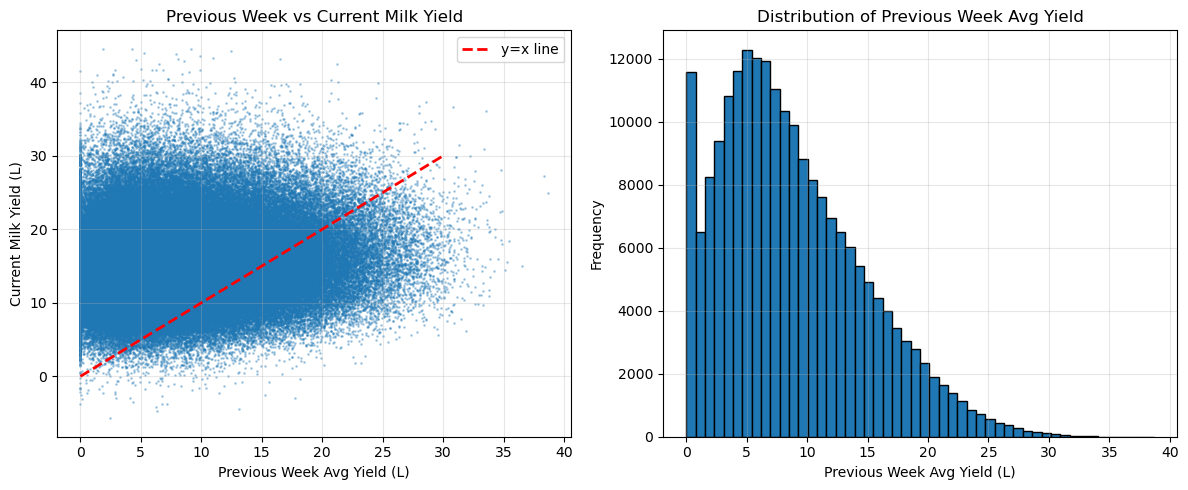

In [7]:
# Analyze Previous Week Avg Yield
print("\n" + "="*50)
print("PREVIOUS WEEK AVG YIELD ANALYSIS")
print("="*50)

print(f"Missing values: {train_data['Previous_Week_Avg_Yield'].isnull().sum()}")
print(f"Mean: {train_data['Previous_Week_Avg_Yield'].mean():.2f}")
print(f"Std: {train_data['Previous_Week_Avg_Yield'].std():.2f}")
print(f"Min: {train_data['Previous_Week_Avg_Yield'].min():.2f}")
print(f"Max: {train_data['Previous_Week_Avg_Yield'].max():.2f}")

# Correlation with target
correlation = train_data['Previous_Week_Avg_Yield'].corr(train_data['Milk_Yield_L'])
print(f"\nCorrelation with Milk_Yield_L: {correlation:.3f}")

# Visualize
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(train_data['Previous_Week_Avg_Yield'], train_data['Milk_Yield_L'],
            alpha=0.3, s=1)
plt.xlabel('Previous Week Avg Yield (L)')
plt.ylabel('Current Milk Yield (L)')
plt.title('Previous Week vs Current Milk Yield')
plt.plot([0, 30], [0, 30], 'r--', linewidth=2, label='y=x line')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(train_data['Previous_Week_Avg_Yield'], bins=50, edgecolor='black')
plt.xlabel('Previous Week Avg Yield (L)')
plt.ylabel('Frequency')
plt.title('Distribution of Previous Week Avg Yield')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Check Correlations of All Numerical Features

ACTUAL COLUMNS IN DATASET
['Cattle_ID', 'Breed', 'Climate_Zone', 'Management_System', 'Age_Months', 'Weight_kg', 'Parity', 'Lactation_Stage', 'Days_in_Milk', 'Feed_Type', 'Feed_Quantity_kg', 'Feeding_Frequency', 'Water_Intake_L', 'Walking_Distance_km', 'Grazing_Duration_hrs', 'Rumination_Time_hrs', 'Resting_Hours', 'Ambient_Temperature_C', 'Humidity_percent', 'Housing_Score', 'FMD_Vaccine', 'Brucellosis_Vaccine', 'HS_Vaccine', 'BQ_Vaccine', 'Anthrax_Vaccine', 'IBR_Vaccine', 'BVD_Vaccine', 'Rabies_Vaccine', 'Previous_Week_Avg_Yield', 'Body_Condition_Score', 'Milking_Interval_hrs', 'Date', 'Farm_ID', 'Feed_Quantity_lb', 'Mastitis', 'Milk_Yield_L']

Total columns: 36

NUMERICAL FEATURES FOUND
['Age_Months', 'Weight_kg', 'Parity', 'Days_in_Milk', 'Feed_Quantity_kg', 'Feeding_Frequency', 'Water_Intake_L', 'Walking_Distance_km', 'Grazing_Duration_hrs', 'Rumination_Time_hrs', 'Resting_Hours', 'Ambient_Temperature_C', 'Humidity_percent', 'Housing_Score', 'FMD_Vaccine', 'Brucellosis_Vaccine', '

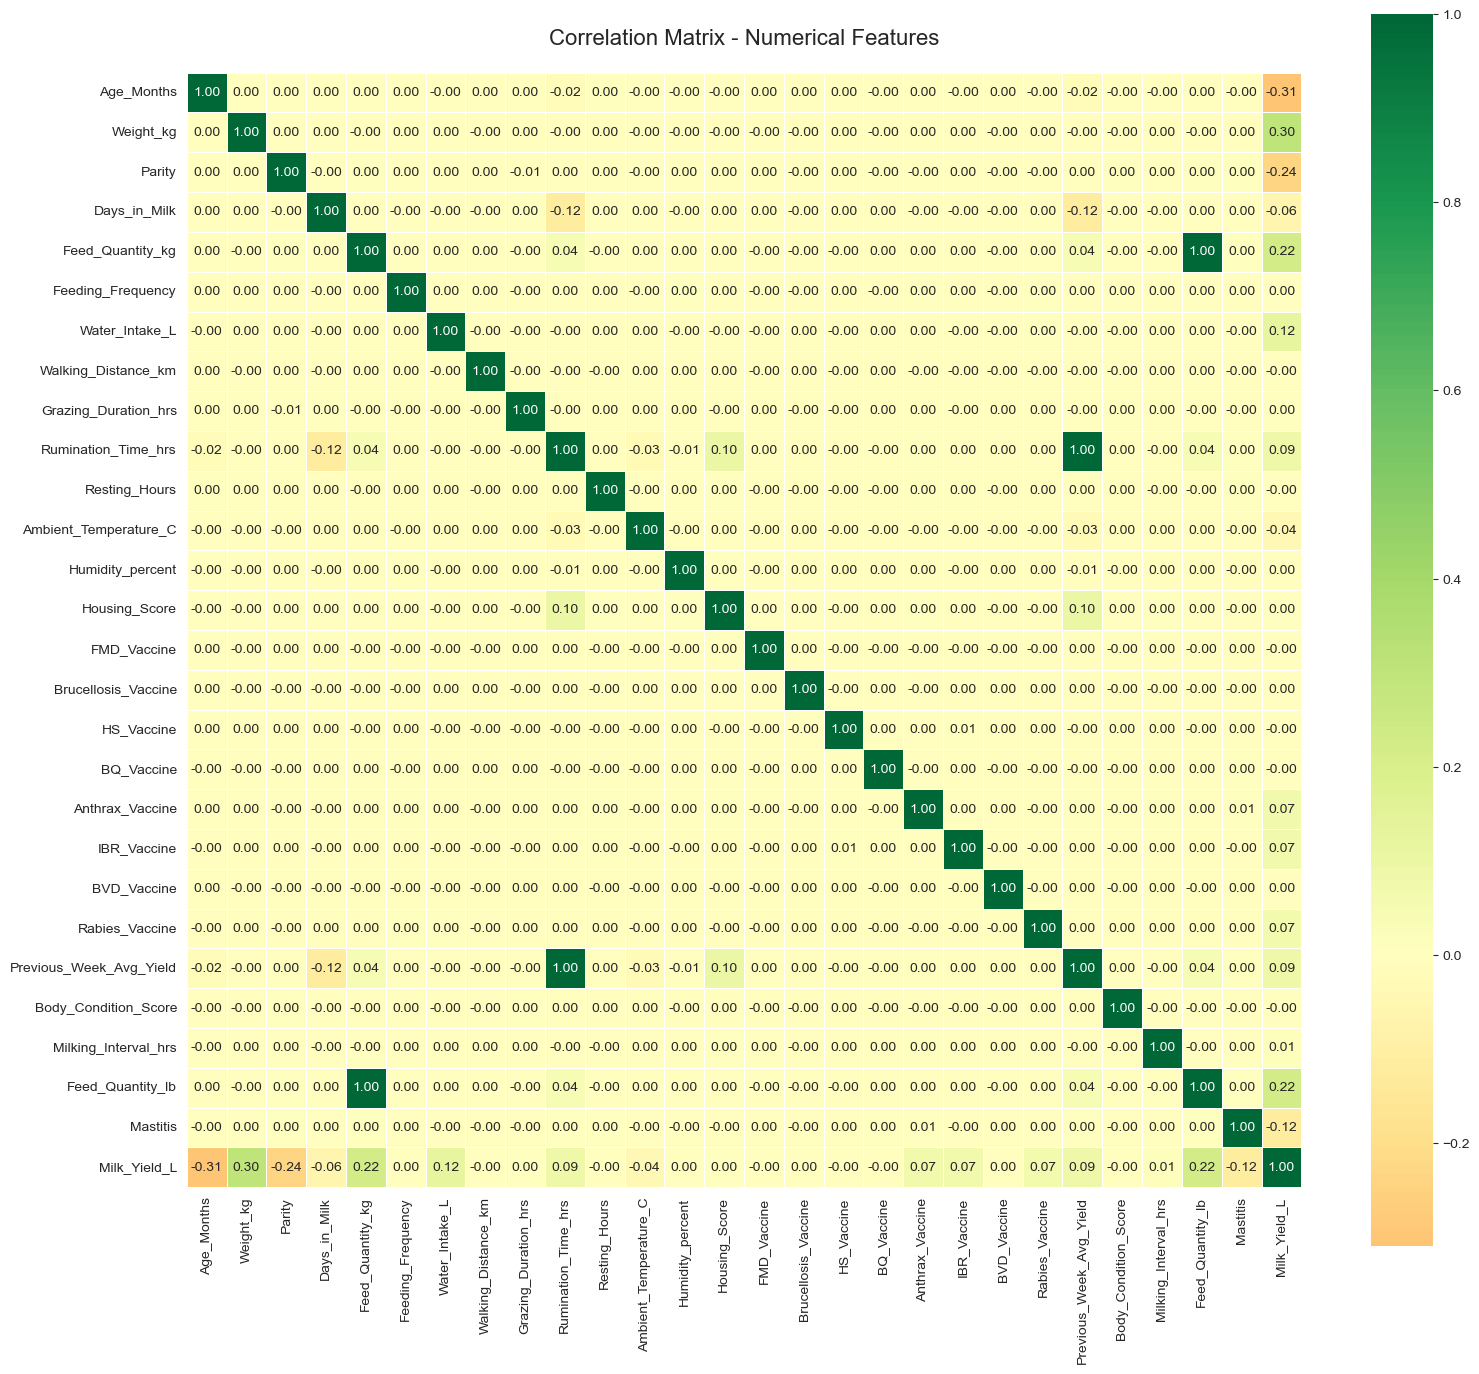


PREVIOUS WEEK AVG YIELD ANALYSIS


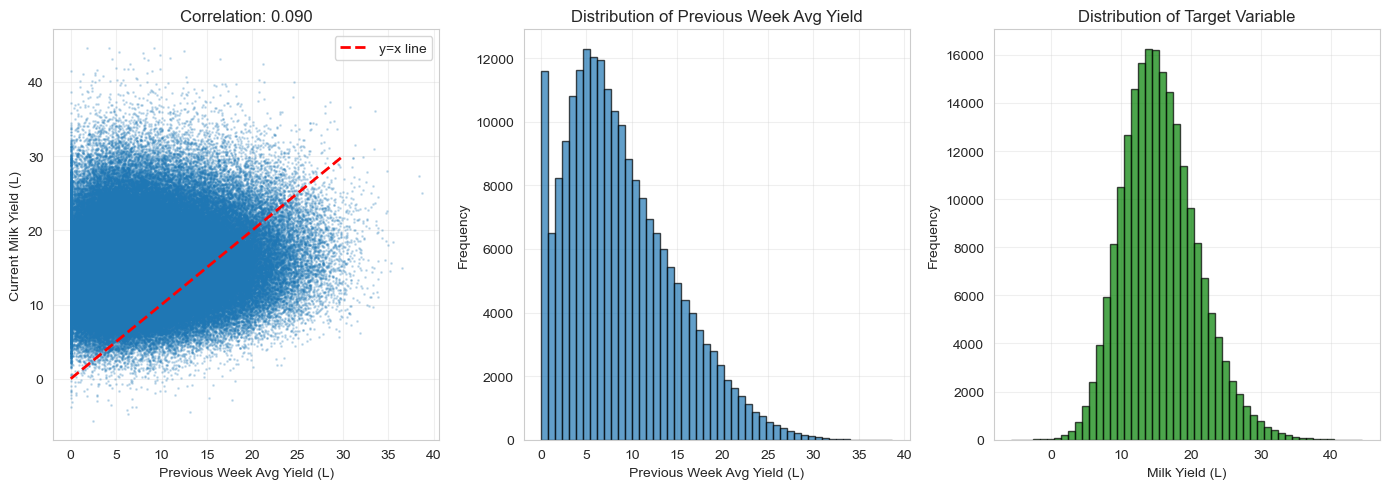


TARGET VARIABLE (MILK_YIELD_L) STATISTICS
count    210000.000000
mean         15.589156
std           5.352079
min          -5.700324
25%          11.822207
50%          15.145871
75%          18.884708
max          44.555285
Name: Milk_Yield_L, dtype: float64


In [8]:
# ============================================
# COMPREHENSIVE DATA EXPLORATION
# ============================================

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# First, let's see what columns we actually have
print("="*60)
print("ACTUAL COLUMNS IN DATASET")
print("="*60)
print(train_data.columns.tolist())
print(f"\nTotal columns: {len(train_data.columns)}")

# Get only the numerical columns that actually exist
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove ID columns and target variable
numerical_features = [col for col in numerical_features if col not in ['Cattle_ID', 'Farm_ID', 'Milk_Yield_L']]

print("\n" + "="*60)
print("NUMERICAL FEATURES FOUND")
print("="*60)
print(numerical_features)

# Get categorical columns
categorical_features = train_data.select_dtypes(include=['object']).columns.tolist()
print("\n" + "="*60)
print("CATEGORICAL FEATURES FOUND")
print("="*60)
print(categorical_features)

# 1. MISSING VALUES
print("\n" + "="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)
missing = train_data.isnull().sum()
missing_pct = (missing / len(train_data)) * 100
missing_df = pd.DataFrame({'Count': missing, 'Percentage': missing_pct})
missing_df = missing_df[missing_df['Count'] > 0].sort_values('Count', ascending=False)
if len(missing_df) > 0:
    print(missing_df)
else:
    print("No missing values found!")

# 2. CORRELATION WITH TARGET
print("\n" + "="*60)
print("TOP CORRELATIONS WITH MILK YIELD")
print("="*60)
correlation_data = train_data[numerical_features + ['Milk_Yield_L']]
correlations = correlation_data.corr()['Milk_Yield_L'].sort_values(ascending=False)
print(correlations)

# 3. CORRELATION HEATMAP
plt.figure(figsize=(16, 14))
correlation_matrix = correlation_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', center=0,
            fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Matrix - Numerical Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# 4. VISUALIZE PREVIOUS WEEK (if it exists)
if 'Previous_Week_Avg_Yield' in train_data.columns:
    print("\n" + "="*60)
    print("PREVIOUS WEEK AVG YIELD ANALYSIS")
    print("="*60)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 3, 1)
    plt.scatter(train_data['Previous_Week_Avg_Yield'], train_data['Milk_Yield_L'],
                alpha=0.2, s=1)
    plt.plot([0, 30], [0, 30], 'r--', linewidth=2, label='y=x line')
    plt.xlabel('Previous Week Avg Yield (L)')
    plt.ylabel('Current Milk Yield (L)')
    plt.title(f'Correlation: {correlations["Previous_Week_Avg_Yield"]:.3f}')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 3, 2)
    plt.hist(train_data['Previous_Week_Avg_Yield'], bins=50, edgecolor='black', alpha=0.7)
    plt.xlabel('Previous Week Avg Yield (L)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Previous Week Avg Yield')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 3, 3)
    plt.hist(train_data['Milk_Yield_L'], bins=50, edgecolor='black', alpha=0.7, color='green')
    plt.xlabel('Milk Yield (L)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Target Variable')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# 5. TARGET VARIABLE STATISTICS
print("\n" + "="*60)
print("TARGET VARIABLE (MILK_YIELD_L) STATISTICS")
print("="*60)
print(train_data['Milk_Yield_L'].describe())

# Analyze Categorical Features


CATEGORICAL FEATURES ANALYSIS

Cattle_ID
                    mean  std  count
Cattle_ID                           
CATTLE_150032  44.555285  NaN      1
CATTLE_193450  44.536204  NaN      1
CATTLE_224494  44.500375  NaN      1
CATTLE_164202  44.219211  NaN      1
CATTLE_045989  43.974357  NaN      1
...                  ...  ...    ...
CATTLE_027345  -3.827216  NaN      1
CATTLE_047042  -4.216326  NaN      1
CATTLE_178934  -4.462703  NaN      1
CATTLE_217430  -4.684691  NaN      1
CATTLE_165478  -5.700324  NaN      1

[209966 rows x 3 columns]

Unique values: 209966

Breed
                   mean       std   count
Breed                                    
Holstien      16.043891  5.735476     112
Holstein      15.596908  5.338175  104775
Guernsey      15.584932  5.336829   31672
Jersey        15.583716  5.373115   42183
Brown Swiss   15.575446  5.384879   31155
 Brown Swiss  15.045644  5.122660      57
Brown Swiss   14.680256  5.329218      46

Unique values: 7

Climate_Zone
          

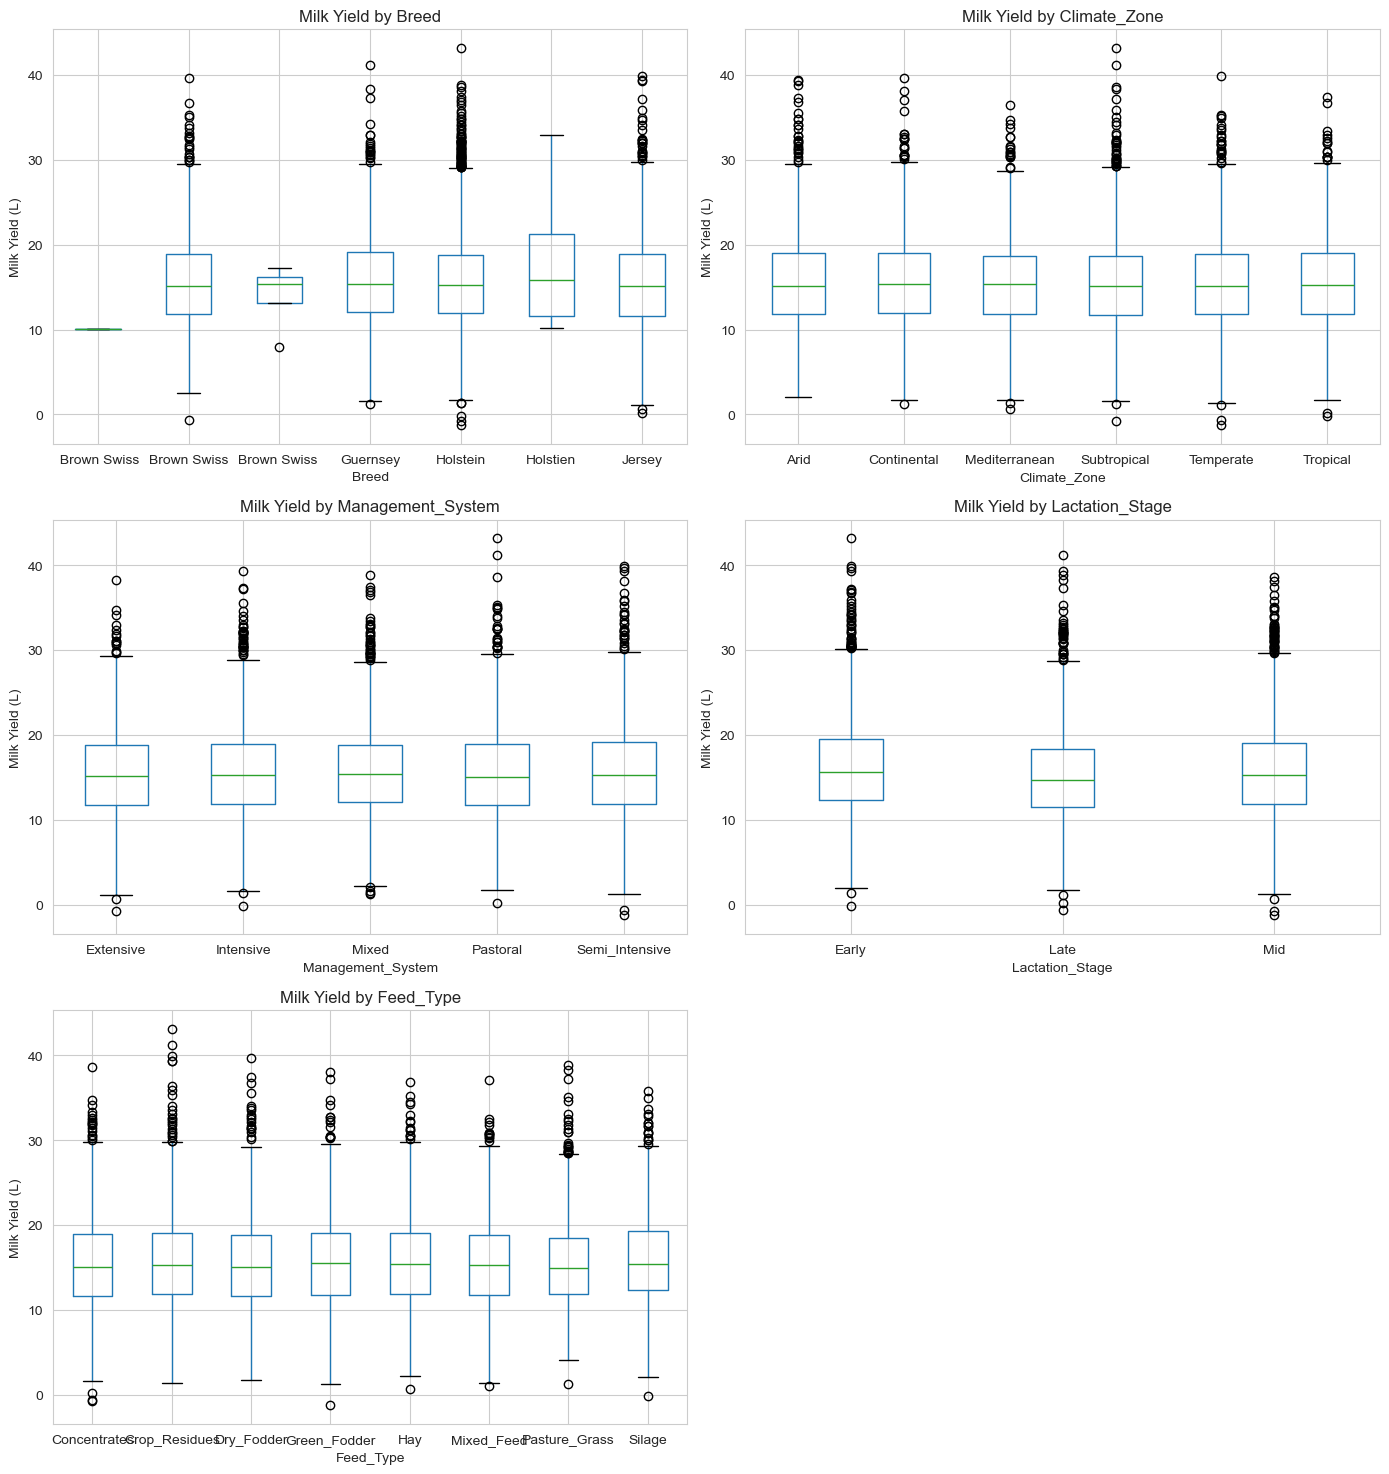

In [9]:
# ============================================
# FAST CATEGORICAL FEATURES ANALYSIS
# ============================================

print("\n" + "="*60)
print("CATEGORICAL FEATURES ANALYSIS")
print("="*60)

categorical_features = train_data.select_dtypes(include=['object']).columns.tolist()

for feature in categorical_features:
    if feature in train_data.columns:
        print(f"\n{'='*50}")
        print(f"{feature}")
        print(f"{'='*50}")

        # Get statistics
        stats = train_data.groupby(feature)['Milk_Yield_L'].agg(['mean', 'std', 'count'])
        stats = stats.sort_values('mean', ascending=False)
        print(stats)

        # Show unique values count
        print(f"\nUnique values: {train_data[feature].nunique()}")

print("\n✓ Categorical analysis complete!")

# Optional: Create plots for ONLY the most important categorical features
print("\nCreating visualizations for key categorical features...")

# Only plot features with reasonable number of categories
key_categorical = []
for feature in categorical_features:
    n_unique = train_data[feature].nunique()
    if 2 <= n_unique <= 10:  # Only if between 2 and 10 categories
        key_categorical.append(feature)

if len(key_categorical) > 0:
    # Use sample for faster plotting
    sample_data = train_data.sample(n=10000, random_state=42)

    n_features = len(key_categorical)
    n_cols = 2
    n_rows = (n_features + 1) // 2

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.flatten()

    for idx, feature in enumerate(key_categorical):
        sample_data.boxplot(column='Milk_Yield_L', by=feature, ax=axes[idx])
        axes[idx].set_title(f'Milk Yield by {feature}')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Milk Yield (L)')
        axes[idx].get_figure().suptitle('')  # Remove automatic title

    # Hide extra subplots
    for idx in range(len(key_categorical), len(axes)):
        axes[idx].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No categorical features with suitable number of categories for plotting.")

# Check for Outliers

In [10]:
# ============================================
# QUICK OUTLIER STATISTICS (NO PLOTS)
# ============================================

print("\n" + "="*60)
print("OUTLIER DETECTION (Statistics Only)")
print("="*60)

key_features = ['Age_Months', 'Weight_kg', 'Milk_Yield_L',
                'Previous_Week_Avg_Yield', 'Days_in_Milk']

for feature in key_features:
    if feature in train_data.columns:
        Q1 = train_data[feature].quantile(0.25)
        Q3 = train_data[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = ((train_data[feature] < lower_bound) |
                   (train_data[feature] > upper_bound)).sum()
        outlier_pct = (outliers / len(train_data)) * 100

        print(f"\n{feature}:")
        print(f"  Range: [{train_data[feature].min():.2f}, {train_data[feature].max():.2f}]")
        print(f"  IQR bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print(f"  Outliers: {outliers:,} ({outlier_pct:.2f}%)")


OUTLIER DETECTION (Statistics Only)

Age_Months:
  Range: [24.00, 143.00]
  IQR bounds: [-36.00, 204.00]
  Outliers: 0 (0.00%)

Weight_kg:
  Range: [250.00, 750.00]
  IQR bounds: [-3.05, 1002.95]
  Outliers: 0 (0.00%)

Milk_Yield_L:
  Range: [-5.70, 44.56]
  IQR bounds: [1.23, 29.48]
  Outliers: 2,677 (1.27%)

Previous_Week_Avg_Yield:
  Range: [0.00, 38.67]
  IQR bounds: [-7.94, 24.62]
  Outliers: 2,406 (1.15%)

Days_in_Milk:
  Range: [1.00, 364.00]
  IQR bounds: [-182.00, 546.00]
  Outliers: 0 (0.00%)


# Data Cleaning & Feature Engineering

## Handle Missing Values

In [11]:
# ============================================
# DATA CLEANING - HANDLE MISSING VALUES
# ============================================

print("Handling missing values...")

# For numerical columns with missing values, use median
train_data['Feed_Quantity_kg'].fillna(train_data['Feed_Quantity_kg'].median(), inplace=True)
train_data['Feed_Quantity_lb'].fillna(train_data['Feed_Quantity_lb'].median(), inplace=True)
train_data['Housing_Score'].fillna(train_data['Housing_Score'].median(), inplace=True)

# Drop rows where any remaining missing values exist
# This addresses the single missing values found in many columns, including the target
train_data.dropna(inplace=True)

# Verify no more missing values
print("\nMissing values after cleaning:")
print(train_data.isnull().sum()[train_data.isnull().sum() > 0])
if train_data.isnull().sum().sum() == 0:
    print("✓ All missing values handled!")

Handling missing values...

Missing values after cleaning:
Series([], dtype: int64)
✓ All missing values handled!


/var/folders/4_/shm11v215kvb1mrml9h4jlx40000gn/T/ipykernel_85252/2564155075.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Feed_Quantity_kg'].fillna(train_data['Feed_Quantity_kg'].median(), inplace=True)
/var/folders/4_/shm11v215kvb1mrml9h4jlx40000gn/T/ipykernel_85252/2564155075.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediat

In [12]:
# ============================================
# FEATURE ENGINEERING
# ============================================

print("\n" + "="*60)
print("FEATURE ENGINEERING")
print("="*60)

# 1. Age-Weight interaction (older, heavier cows might behave differently)
train_data['Age_Weight_Interaction'] = train_data['Age_Months'] * train_data['Weight_kg']

# 2. Feed efficiency (feed per kg of body weight)
train_data['Feed_Efficiency'] = train_data['Feed_Quantity_kg'] / train_data['Weight_kg']

# 3. Water efficiency (water per kg of body weight)
train_data['Water_Efficiency'] = train_data['Water_Intake_L'] / train_data['Weight_kg']

# 4. Activity level (walking + grazing + rumination)
train_data['Total_Activity_hrs'] = (train_data['Walking_Distance_km'] +
                                     train_data['Grazing_Duration_hrs'] +
                                     train_data['Rumination_Time_hrs'])

# 5. Previous week difference from mean (is this cow producing above/below average?)
train_data['Prev_Week_vs_Mean'] = train_data['Previous_Week_Avg_Yield'] - train_data['Previous_Week_Avg_Yield'].mean()

# 6. Days in milk squared (non-linear relationship)
train_data['Days_in_Milk_Squared'] = train_data['Days_in_Milk'] ** 2

# 7. Age categories (young, prime, old)
train_data['Age_Category'] = pd.cut(train_data['Age_Months'],
                                     bins=[0, 36, 84, 200],
                                     labels=['Young', 'Prime', 'Old'])

print("✓ Created new features!")
print(f"Total features now: {train_data.shape[1]}")


FEATURE ENGINEERING
✓ Created new features!
Total features now: 43


# Encode Categorical Variables

In [13]:
# ============================================
# ENCODE CATEGORICAL VARIABLES
# ============================================

print("\n" + "="*60)
print("ENCODING CATEGORICAL VARIABLES")
print("="*60)

from sklearn.preprocessing import LabelEncoder

# Make a copy for encoding
train_encoded = train_data.copy()

# Categorical columns to encode
categorical_cols = ['Breed', 'Climate_Zone', 'Management_System',
                   'Lactation_Stage', 'Feed_Type', 'Date', 'Age_Category']

# Method 1: Label Encoding for ordinal features
label_encoders = {}
for col in categorical_cols:
    if col in train_encoded.columns:
        le = LabelEncoder()
        train_encoded[col + '_Encoded'] = le.fit_transform(train_encoded[col].astype(str))
        label_encoders[col] = le
        print(f"✓ Encoded {col}")

# Method 2: One-Hot Encoding for nominal features (creates multiple columns)
# For features with few categories, one-hot encoding works better
train_encoded = pd.get_dummies(train_encoded,
                                columns=['Breed', 'Climate_Zone', 'Management_System',
                                        'Lactation_Stage', 'Feed_Type'],
                                prefix=['Breed', 'Climate', 'Mgmt', 'Lactation', 'Feed'],
                                drop_first=True)  # Avoid multicollinearity

print(f"\n✓ Encoding complete!")
print(f"Total columns after encoding: {train_encoded.shape[1]}")


ENCODING CATEGORICAL VARIABLES
✓ Encoded Breed
✓ Encoded Climate_Zone
✓ Encoded Management_System
✓ Encoded Lactation_Stage
✓ Encoded Feed_Type
✓ Encoded Date
✓ Encoded Age_Category

✓ Encoding complete!
Total columns after encoding: 69


# Prepare Data for Modeling

In [14]:
# ============================================
# PREPARE DATA FOR MODELING
# ============================================

print("\n" + "="*60)
print("PREPARING DATA FOR MODELING")
print("="*60)

# Remove columns we don't need for modeling
columns_to_drop = ['Cattle_ID', 'Farm_ID', 'Date', 'Age_Category',
                   'Breed_Encoded', 'Climate_Zone_Encoded', 'Management_System_Encoded',
                   'Lactation_Stage_Encoded', 'Feed_Type_Encoded']

# Keep only columns that exist
columns_to_drop = [col for col in columns_to_drop if col in train_encoded.columns]

# Separate features and target
X = train_encoded.drop(columns_to_drop + ['Milk_Yield_L'], axis=1)
y = train_encoded['Milk_Yield_L']

# Store feature columns names for consistent processing of test data
feature_columns = X.columns

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Scale numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("\n✓ Data ready for modeling!")


PREPARING DATA FOR MODELING
Features shape: (210000, 59)
Target shape: (210000,)

✓ Data ready for modeling!


# Split Data & Start Modeling

In [15]:
# ============================================
# SPLIT DATA AND BASELINE MODEL
# ============================================

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split data
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y,
                                                    test_size=0.2,
                                                    random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")

# BASELINE MODEL: Simple Linear Regression
print("\n" + "="*60)
print("BASELINE MODEL: LINEAR REGRESSION")
print("="*60)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_train_pred = lr_model.predict(X_train)
y_val_pred = lr_model.predict(X_val)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

print(f"Training RMSE: {train_rmse:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}")
print(f"Validation R²: {val_r2:.4f}")

print("\n✓ Baseline model complete!")

Training set: 168000 samples
Validation set: 42000 samples

BASELINE MODEL: LINEAR REGRESSION
Training RMSE: 4.2985
Validation RMSE: 4.3136
Validation R²: 0.3520

✓ Baseline model complete!


## baseline model is working and you have a Validation RMSE of 4.31, which is a solid start. Now let's improve it by trying more advanced models.

## New Models Added (Based on DiegoVersion Strategies)

We've added the following models to match the techniques used in DiegoVersion:

1. **Decision Tree Regressor** - A single decision tree model (different from Random Forest which uses multiple trees)
2. **Support Vector Regressor (SVM)** - Support Vector Machine adapted for regression
3. **Naive Bayes (Adapted for Regression)** - Naive Bayes classifier adapted for regression by discretizing the target variable

### Strategies Implemented from DiegoVersion:

- **Feature Importance Analysis**: Added for Decision Tree (similar to Random Forest)
- **Hyperparameter Tuning**: Already implemented for XGBoost (similar to DiegoVersion's GridSearchCV approach)
- **Feature Scaling**: StandardScaler used (similar to DiegoVersion's approach)
- **Model Comparison**: Updated to include all new models with RMSE and R² metrics


## Try Advanced Models

# 1. Random Forest Regressor

In [16]:
# ============================================
# MODEL 2: RANDOM FOREST
# ============================================

from sklearn.ensemble import RandomForestRegressor

print("\n" + "="*60)
print("MODEL 2: RANDOM FOREST")
print("="*60)

# Train Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,      # Number of trees
    max_depth=20,          # Maximum depth of trees
    min_samples_split=10,  # Minimum samples to split
    random_state=42,
    n_jobs=-1              # Use all CPU cores
)

rf_model.fit(X_train, y_train)

# Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_val_pred_rf = rf_model.predict(X_val)

# Calculate RMSE
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
val_rmse_rf = np.sqrt(mean_squared_error(y_val, y_val_pred_rf))
val_r2_rf = r2_score(y_val, y_val_pred_rf)

print(f"Training RMSE: {train_rmse_rf:.4f}")
print(f"Validation RMSE: {val_rmse_rf:.4f}")
print(f"Validation R²: {val_r2_rf:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


MODEL 2: RANDOM FOREST
Training RMSE: 2.4842
Validation RMSE: 4.3421
Validation R²: 0.3434

Top 10 Most Important Features:
                  feature  importance
0              Age_Months    0.153451
1               Weight_kg    0.136519
2                  Parity    0.070383
4        Feed_Quantity_kg    0.058225
6          Water_Intake_L    0.046970
33           Date_Encoded    0.040003
25       Feed_Quantity_lb    0.034243
11  Ambient_Temperature_C    0.032540
13          Housing_Score    0.029499
12       Humidity_percent    0.028643


## 1.5 Decision Tree Regressor


In [17]:
# ============================================
# MODEL 1.5: DECISION TREE
# ============================================

from sklearn.tree import DecisionTreeRegressor

print("\n" + "="*60)
print("MODEL 1.5: DECISION TREE")
print("="*60)

# Train Decision Tree
dt_model = DecisionTreeRegressor(
    max_depth=20,          # Maximum depth of tree
    min_samples_split=10,  # Minimum samples to split
    min_samples_leaf=5,    # Minimum samples in leaf
    random_state=42
)

dt_model.fit(X_train, y_train)

# Predictions
y_train_pred_dt = dt_model.predict(X_train)
y_val_pred_dt = dt_model.predict(X_val)

# Calculate RMSE
train_rmse_dt = np.sqrt(mean_squared_error(y_train, y_train_pred_dt))
val_rmse_dt = np.sqrt(mean_squared_error(y_val, y_val_pred_dt))
val_r2_dt = r2_score(y_val, y_val_pred_dt)

print(f"Training RMSE: {train_rmse_dt:.4f}")
print(f"Validation RMSE: {val_rmse_dt:.4f}")
print(f"Validation R²: {val_r2_dt:.4f}")

# Feature importance
feature_importance_dt = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance_dt.head(10))



MODEL 1.5: DECISION TREE
Training RMSE: 2.6872
Validation RMSE: 5.5191
Validation R²: -0.0608

Top 10 Most Important Features:
                  feature  importance
0              Age_Months    0.166719
1               Weight_kg    0.143725
2                  Parity    0.077320
4        Feed_Quantity_kg    0.053047
6          Water_Intake_L    0.045470
33           Date_Encoded    0.042561
25       Feed_Quantity_lb    0.041384
11  Ambient_Temperature_C    0.028818
13          Housing_Score    0.028031
7     Walking_Distance_km    0.025283


## 2. Gradient Boosting Regressor

In [18]:
# ============================================
# MODEL 3: GRADIENT BOOSTING
# ============================================

from sklearn.ensemble import GradientBoostingRegressor

print("\n" + "="*60)
print("MODEL 3: GRADIENT BOOSTING")
print("="*60)

# Train Gradient Boosting
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

gb_model.fit(X_train, y_train)

# Predictions
y_train_pred_gb = gb_model.predict(X_train)
y_val_pred_gb = gb_model.predict(X_val)

# Calculate RMSE
train_rmse_gb = np.sqrt(mean_squared_error(y_train, y_train_pred_gb))
val_rmse_gb = np.sqrt(mean_squared_error(y_val, y_val_pred_gb))
val_r2_gb = r2_score(y_val, y_val_pred_gb)

print(f"Training RMSE: {train_rmse_gb:.4f}")
print(f"Validation RMSE: {val_rmse_gb:.4f}")
print(f"Validation R²: {val_r2_gb:.4f}")


MODEL 3: GRADIENT BOOSTING
Training RMSE: 4.0558
Validation RMSE: 4.1567
Validation R²: 0.3983


## 2.5 Support Vector Regressor (SVM)


In [19]:
# ============================================
# MODEL 2.5: SUPPORT VECTOR REGRESSOR (SVM)
# ============================================

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

print("\n" + "="*60)
print("MODEL 2.5: SUPPORT VECTOR REGRESSOR (SVM)")
print("="*60)

# Note: SVR is sensitive to feature scaling, so we use the already scaled data
# X_train and X_val are already scaled from previous steps

# Train SVR with optimized parameters
# SVR training time scales roughly O(n²) to O(n³) with number of samples
# Reduced sample size for faster training:
# - 10,000 samples: ~2-5 minutes (FAST - current setting)
# - 20,000 samples: ~5-10 minutes (BALANCED)
# - 50,000 samples: ~15-30 minutes (SLOW but better results)
sample_size = min(10000, len(X_train))  # Fast option - change to 20000 or 50000 if needed

np.random.seed(42)  # For reproducibility
sample_indices = np.random.choice(len(X_train), sample_size, replace=False)

# Handle both DataFrame and array cases
if isinstance(X_train, pd.DataFrame):
    X_train_svr = X_train.iloc[sample_indices]
    y_train_svr = y_train.iloc[sample_indices] if isinstance(y_train, pd.Series) else y_train[sample_indices]
else:
    X_train_svr = X_train[sample_indices]
    y_train_svr = y_train[sample_indices]

svr_model = SVR(
    kernel='rbf',          # Radial Basis Function kernel
    C=100,                 # Regularization parameter
    epsilon=0.1,           # Epsilon-tube for regression
    gamma='scale'          # Kernel coefficient
)

import time
print(f"Training SVR on {len(X_train_svr)} samples (out of {len(X_train)} total)...")
print("Expected time: 2-5 minutes...")

start_time = time.time()
svr_model.fit(X_train_svr, y_train_svr)
training_time = time.time() - start_time
print(f"✓ Training completed in {training_time:.1f} seconds ({training_time/60:.1f} minutes)")

# Predictions
y_train_pred_svr = svr_model.predict(X_train)
y_val_pred_svr = svr_model.predict(X_val)

# Calculate RMSE
train_rmse_svr = np.sqrt(mean_squared_error(y_train, y_train_pred_svr))
val_rmse_svr = np.sqrt(mean_squared_error(y_val, y_val_pred_svr))
val_r2_svr = r2_score(y_val, y_val_pred_svr)

print(f"Training RMSE: {train_rmse_svr:.4f}")
print(f"Validation RMSE: {val_rmse_svr:.4f}")
print(f"Validation R²: {val_r2_svr:.4f}")



MODEL 2.5: SUPPORT VECTOR REGRESSOR (SVM)
Training SVR on 10000 samples (out of 168000 total)...
Expected time: 2-5 minutes...
✓ Training completed in 66.8 seconds (1.1 minutes)
Training RMSE: 4.8917
Validation RMSE: 5.0511
Validation R²: 0.1115


## 3. XGBoost (Usually Best for Tabular Data)

In [20]:
# ============================================
# MODEL 4: XGBOOST
# ============================================

# First, install xgboost if not already installed
# !pip install xgboost

import xgboost as xgb

print("\n" + "="*60)
print("MODEL 4: XGBOOST")
print("="*60)

# Train XGBoost
xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)

# Predictions
y_train_pred_xgb = xgb_model.predict(X_train)
y_val_pred_xgb = xgb_model.predict(X_val)

# Calculate RMSE
train_rmse_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
val_rmse_xgb = np.sqrt(mean_squared_error(y_val, y_val_pred_xgb))
val_r2_xgb = r2_score(y_val, y_val_pred_xgb)

print(f"Training RMSE: {train_rmse_xgb:.4f}")
print(f"Validation RMSE: {val_rmse_xgb:.4f}")
print(f"Validation R²: {val_r2_xgb:.4f}")


MODEL 4: XGBOOST
Training RMSE: 3.9959
Validation RMSE: 4.1512
Validation R²: 0.3999


## 3.5 Naive Bayes (Adapted for Regression)


In [21]:
# ============================================
# MODEL 3.5: NAIVE BAYES (ADAPTED FOR REGRESSION)
# ============================================

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("\n" + "="*60)
print("MODEL 3.5: NAIVE BAYES (ADAPTED FOR REGRESSION)")
print("="*60)

# Naive Bayes is typically for classification, but we can adapt it for regression
# by discretizing the target variable into bins, training a classifier, 
# then using the predicted class probabilities to estimate the continuous value

# Discretize target variable into bins
n_bins = 50  # Number of bins for discretization
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
y_train_binned = discretizer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_val_binned = discretizer.transform(y_val.values.reshape(-1, 1)).ravel()

# Get bin centers for mapping predictions back to continuous values
bin_edges = discretizer.bin_edges_[0]
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Train Gaussian Naive Bayes on discretized target
nb_model = GaussianNB()
nb_model.fit(X_train, y_train_binned)

# Get predicted probabilities for each bin
y_train_proba = nb_model.predict_proba(X_train)
y_val_proba = nb_model.predict_proba(X_val)

# Convert probabilities to continuous predictions using weighted average of bin centers
y_train_pred_nb = np.dot(y_train_proba, bin_centers)
y_val_pred_nb = np.dot(y_val_proba, bin_centers)

# Calculate RMSE
train_rmse_nb = np.sqrt(mean_squared_error(y_train, y_train_pred_nb))
val_rmse_nb = np.sqrt(mean_squared_error(y_val, y_val_pred_nb))
val_r2_nb = r2_score(y_val, y_val_pred_nb)

print(f"Training RMSE: {train_rmse_nb:.4f}")
print(f"Validation RMSE: {val_rmse_nb:.4f}")
print(f"Validation R²: {val_r2_nb:.4f}")
print(f"\nNote: Naive Bayes adapted for regression using {n_bins} bins")



MODEL 3.5: NAIVE BAYES (ADAPTED FOR REGRESSION)
Training RMSE: 21.4539
Validation RMSE: 21.3940
Validation R²: -14.9402

Note: Naive Bayes adapted for regression using 50 bins


# 4. Neural Network (MLP Regressor)

In [22]:
# ============================================
# MODEL 5: NEURAL NETWORK
# ============================================

from sklearn.neural_network import MLPRegressor

print("\n" + "="*60)
print("MODEL 5: NEURAL NETWORK")
print("="*60)

# Train Neural Network
nn_model = MLPRegressor(
    hidden_layer_sizes=(100, 50, 25),  # 3 hidden layers
    activation='relu',
    alpha=0.01,                         # L2 regularization
    learning_rate='adaptive',
    max_iter=500,
    random_state=42
)

nn_model.fit(X_train, y_train)

# Predictions
y_train_pred_nn = nn_model.predict(X_train)
y_val_pred_nn = nn_model.predict(X_val)

# Calculate RMSE
train_rmse_nn = np.sqrt(mean_squared_error(y_train, y_train_pred_nn))
val_rmse_nn = np.sqrt(mean_squared_error(y_val, y_val_pred_nn))
val_r2_nn = r2_score(y_val, y_val_pred_nn)

print(f"Training RMSE: {train_rmse_nn:.4f}")
print(f"Validation RMSE: {val_rmse_nn:.4f}")
print(f"Validation R²: {val_r2_nn:.4f}")


MODEL 5: NEURAL NETWORK
Training RMSE: 3.8300
Validation RMSE: 4.6910
Validation R²: 0.2336


/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


# 5. Compare All Models


MODEL COMPARISON SUMMARY
            Model  Train_RMSE  Val_RMSE     Val_R2
          XGBoost    3.995873  4.151185   0.399857
Gradient Boosting    4.055833  4.156689   0.398264
Linear Regression    4.298548  4.313614   0.351973
    Random Forest    2.484172  4.342100   0.343386
   Neural Network    3.830008  4.691023   0.233617
        SVM (SVR)    4.891721  5.051082   0.111455
    Decision Tree    2.687211  5.519095  -0.060832
      Naive Bayes   21.453884 21.393970 -14.940187

🏆 Best Model: XGBoost
   Validation RMSE: 4.1512
   Validation R²: 0.3999


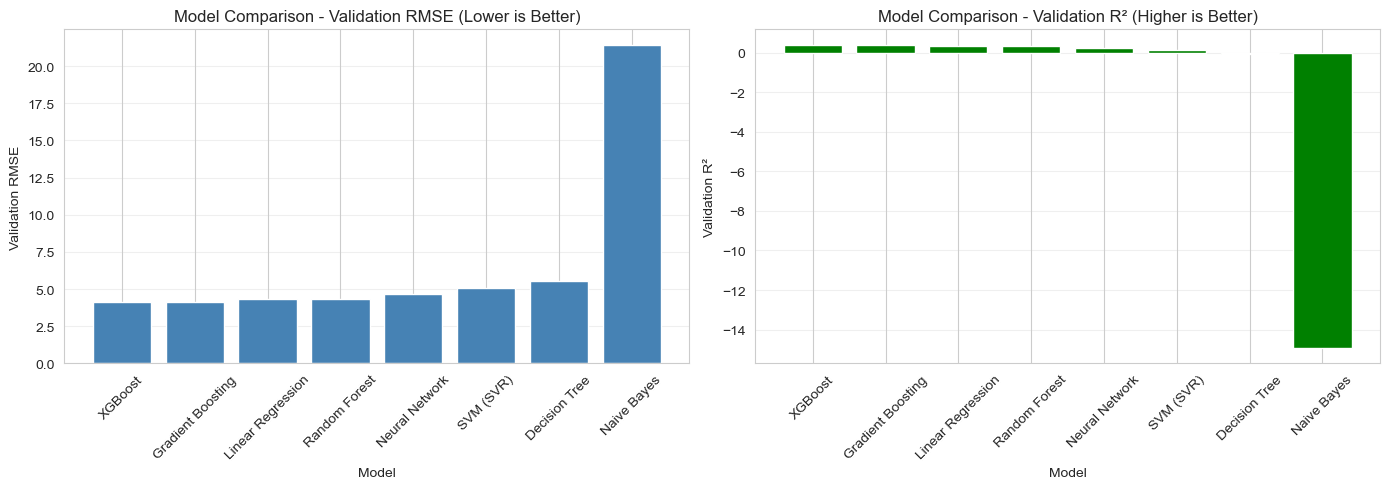

In [23]:
# ============================================
# MODEL COMPARISON
# ============================================

print("\n" + "="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVM (SVR)', 
              'Gradient Boosting', 'XGBoost', 'Naive Bayes', 'Neural Network'],
    'Train_RMSE': [train_rmse, train_rmse_dt, train_rmse_rf, train_rmse_svr,
                   train_rmse_gb, train_rmse_xgb, train_rmse_nb, train_rmse_nn],
    'Val_RMSE': [val_rmse, val_rmse_dt, val_rmse_rf, val_rmse_svr,
                 val_rmse_gb, val_rmse_xgb, val_rmse_nb, val_rmse_nn],
    'Val_R2': [val_r2, val_r2_dt, val_r2_rf, val_r2_svr, 
               val_r2_gb, val_r2_xgb, val_r2_nb, val_r2_nn]
})

results = results.sort_values('Val_RMSE')
print(results.to_string(index=False))

print(f"\n🏆 Best Model: {results.iloc[0]['Model']}")
print(f"   Validation RMSE: {results.iloc[0]['Val_RMSE']:.4f}")
print(f"   Validation R²: {results.iloc[0]['Val_R2']:.4f}")

# Visualize comparison
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# RMSE comparison
axes[0].bar(results['Model'], results['Val_RMSE'], color='steelblue')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Validation RMSE')
axes[0].set_title('Model Comparison - Validation RMSE (Lower is Better)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# R² comparison
axes[1].bar(results['Model'], results['Val_R2'], color='green')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Validation R²')
axes[1].set_title('Model Comparison - Validation R² (Higher is Better)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [24]:
# ============================================
# MODEL PERFORMANCE SUMMARY TABLE
# ============================================

import pandas as pd

# Create results dataframe
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting',
              'XGBoost', 'Neural Network'],
    'Train_RMSE': [train_rmse, train_rmse_rf, train_rmse_gb,
                   train_rmse_xgb, train_rmse_nn],
    'Val_RMSE': [val_rmse, val_rmse_rf, val_rmse_gb,
                 val_rmse_xgb, val_rmse_nn],
    'Val_R2': [val_r2, val_r2_rf, val_r2_gb, val_r2_xgb, val_r2_nn]
})

# Sort by validation RMSE (best first)
results = results.sort_values('Val_RMSE')

print("\nMODEL PERFORMANCE COMPARISON")
print("="*60)
print(results.to_string(index=False))
print("="*60)
print(f"\nBest Model: {results.iloc[0]['Model']} (Val RMSE: {results.iloc[0]['Val_RMSE']:.4f})")


MODEL PERFORMANCE COMPARISON
            Model  Train_RMSE  Val_RMSE   Val_R2
          XGBoost    3.995873  4.151185 0.399857
Gradient Boosting    4.055833  4.156689 0.398264
Linear Regression    4.298548  4.313614 0.351973
    Random Forest    2.484172  4.342100 0.343386
   Neural Network    3.830008  4.691023 0.233617

Best Model: XGBoost (Val RMSE: 4.1512)


## Hyperparameter Tuning on XGBoost

In [25]:
# ============================================
# HYPERPARAMETER TUNING - XGBOOST
# ============================================

from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

print("\n" + "="*60)
print("HYPERPARAMETER TUNING - XGBOOST")
print("="*60)

# Define parameter grid
param_grid = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}

# Create model
xgb_model = xgb.XGBRegressor(random_state=42, n_jobs=-1)

# Randomized search (faster than grid search)
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # Try 20 random combinations
    cv=3,       # 3-fold cross-validation
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Starting hyperparameter search...")
random_search.fit(X_train, y_train)

print(f"\n✓ Best parameters found:")
print(random_search.best_params_)

# Train with best parameters
best_xgb = random_search.best_estimator_

# Predictions
y_val_pred_best = best_xgb.predict(X_val)
val_rmse_best = np.sqrt(mean_squared_error(y_val, y_val_pred_best))
val_r2_best = r2_score(y_val, y_val_pred_best)

print(f"\n{'='*60}")
print(f"TUNED XGBOOST RESULTS")
print(f"{'='*60}")
print(f"Validation RMSE: {val_rmse_best:.4f}")
print(f"Validation R²: {val_r2_best:.4f}")
print(f"Improvement: {val_rmse_xgb - val_rmse_best:.4f}")


HYPERPARAMETER TUNING - XGBOOST
Starting hyperparameter search...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

✓ Best parameters found:
{'subsample': 0.7, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}

TUNED XGBOOST RESULTS
Validation RMSE: 4.1401
Validation R²: 0.4031
Improvement: 0.0111


## Ensemble Models

Combine your best models for potentially better results:

In [26]:
# ============================================
# ADVANCED ENSEMBLE USING MULTIPLE MODELS
# ============================================

from itertools import product
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("\n" + "="*60)
print("ADVANCED ENSEMBLE - TOP MODELS")
print("="*60)

# Ensure y_val is a 1D array
y_val_array = np.asarray(y_val).ravel()

# 1) Map model names (as in `results['Model']`) to their validation predictions
#    Adjust variable names if yours are different.
model_preds = {
    'Linear Regression':   np.asarray(lr_model.predict(X_val)).ravel(),
    'Random Forest':       np.asarray(rf_model.predict(X_val)).ravel(),
    'Gradient Boosting':   np.asarray(gb_model.predict(X_val)).ravel(),
    # If you used tuning: use best_xgb; otherwise xgb_model
    'XGBoost':             np.asarray(best_xgb.predict(X_val)).ravel(),
    # Keras / NN models often return shape (n, 1); ravel() flattens them
    'Neural Network':      np.asarray(nn_model.predict(X_val)).ravel()
}

# 2) Decide which models to ensemble: take the top 3 by Val_RMSE from your `results`
top_k = 3
top_models = list(results.sort_values('Val_RMSE')['Model'].head(top_k))

print(f"\nUsing top {top_k} models in ensemble:", top_models)

# Build prediction matrix for those models: shape (n_samples, top_k)
pred_matrix = np.column_stack([model_preds[m] for m in top_models])

# 3) Grid search over weights that sum to 1 (step = 0.1)
weight_step = 0.1
candidate_weights = []

if top_k == 2:
    # For 2 models: w1 in [0,1], w2 = 1 - w1
    for w1 in np.arange(0, 1 + weight_step, weight_step):
        w2 = 1.0 - w1
        candidate_weights.append((w1, w2))
elif top_k == 3:
    # For 3 models: w1 + w2 + w3 = 1
    for w1 in np.arange(0, 1 + weight_step, weight_step):
        for w2 in np.arange(0, 1 - w1 + weight_step, weight_step):
            w3 = 1.0 - w1 - w2
            if w3 < -1e-9:
                continue
            candidate_weights.append((w1, w2, max(0.0, w3)))
else:
    raise ValueError("This block currently supports top_k=2 or 3.")

best_rmse = float('inf')
best_r2 = None
best_weights = None

print("\nTrying weight combinations (summing to 1):")
print("-" * 50)

for w in candidate_weights:
    w = np.array(w)

    # Weighted ensemble prediction
    ensemble_preds = pred_matrix @ w

    rmse = np.sqrt(mean_squared_error(y_val_array, ensemble_preds))
    r2   = r2_score(y_val_array, ensemble_preds)

    print(f"Weights {dict(zip(top_models, [round(x, 2) for x in w]))} "
          f"→ RMSE: {rmse:.4f}, R²: {r2:.4f}")

    if rmse < best_rmse:
        best_rmse = rmse
        best_r2 = r2
        best_weights = w

print("-" * 50)

print("\n✓ Best Ensemble Found!")
print("  Models & Weights:")
for name, w in zip(top_models, best_weights):
    print(f"    {name}: {w:.2f}")

print(f"\n  Ensemble Val RMSE: {best_rmse:.4f}")
print(f"  Ensemble Val R²:   {best_r2:.4f}")

# 4) Compare against individual models (using `results`)
print("\nComparison vs individual models (from results table):")
print(results[['Model', 'Val_RMSE', 'Val_R2']].to_string(index=False))

# 5) Decide whether to use ensemble
best_single_idx = results['Val_RMSE'].idxmin()
best_single_model = results.loc[best_single_idx, 'Model']
best_single_rmse = results.loc[best_single_idx, 'Val_RMSE']

if best_rmse < best_single_rmse:
    print(f"\n🏆 Ensemble beats best single model ({best_single_model}) "
          f"by {best_single_rmse - best_rmse:.4f} RMSE!")
    use_ensemble = True
else:
    print(f"\n✗ Ensemble does NOT beat best single model "
          f"({best_single_model}). Stick with that one.")
    use_ensemble = False

# 6) Store best ensemble predictions for validation
best_ensemble_preds = None
best_ensemble_models = top_models
best_ensemble_weights = best_weights

if use_ensemble:
    best_ensemble_preds = pred_matrix @ best_weights



ADVANCED ENSEMBLE - TOP MODELS

Using top 3 models in ensemble: ['XGBoost', 'Gradient Boosting', 'Linear Regression']

Trying weight combinations (summing to 1):
--------------------------------------------------
Weights {'XGBoost': np.float64(0.0), 'Gradient Boosting': np.float64(0.0), 'Linear Regression': np.float64(1.0)} → RMSE: 4.3136, R²: 0.3520
Weights {'XGBoost': np.float64(0.0), 'Gradient Boosting': np.float64(0.1), 'Linear Regression': np.float64(0.9)} → RMSE: 4.2845, R²: 0.3607
Weights {'XGBoost': np.float64(0.0), 'Gradient Boosting': np.float64(0.2), 'Linear Regression': np.float64(0.8)} → RMSE: 4.2583, R²: 0.3685
Weights {'XGBoost': np.float64(0.0), 'Gradient Boosting': np.float64(0.3), 'Linear Regression': np.float64(0.7)} → RMSE: 4.2350, R²: 0.3754
Weights {'XGBoost': np.float64(0.0), 'Gradient Boosting': np.float64(0.4), 'Linear Regression': np.float64(0.6)} → RMSE: 4.2147, R²: 0.3814
Weights {'XGBoost': np.float64(0.0), 'Gradient Boosting': np.float64(0.5), 'Linear Reg

In [27]:
[x for x in dir() if x.startswith("X")]

['X', 'X_scaled', 'X_train', 'X_train_svr', 'X_val']

In [28]:
# ============================================
# BUILD TEST FEATURES, PREDICT, CREATE KAGGLE CSV
# ============================================

import pandas as pd
import numpy as np

print("\n" + "="*60)
print("GENERATING KAGGLE SUBMISSION")
print("="*60)

# Calculate median feed efficiency from training data before processing test data
# This assumes 'Feed_Efficiency' is already created and cleaned in train_data
train_median_feed_efficiency = train_data['Feed_Efficiency'].median()

# 1. Load test data
test_df = pd.read_csv('cattle_data_test.csv')

# IMPORTANT: Capture Cattle_IDs from the original test_df BEFORE any potential row dropping
test_ids = test_df["Cattle_ID"]

# Drop target variable if it exists in test_df (shouldn't for actual test set)
if 'Milk_Yield_L' in test_df.columns:
    test_df = test_df.drop(columns=['Milk_Yield_L'])

test_processed = test_df.copy() # Use a new variable name for clarity

# --- 2) Apply SAME feature engineering as training ---

# 1. Age-Weight interaction (older, heavier cows might behave differently)
test_processed['Age_Weight_Interaction'] = test_processed['Age_Months'] * test_processed['Weight_kg']

# 2. Feed efficiency (feed per kg of body weight)
test_processed['Feed_Efficiency'] = test_processed['Feed_Quantity_kg'] / test_processed['Weight_kg']

# 3. Water efficiency (water per kg of body weight)
test_processed['Water_Efficiency'] = test_processed['Water_Intake_L'] / test_processed['Weight_kg']

# 4. Activity level (walking + grazing + rumination)
test_processed['Total_Activity_hrs'] = (test_processed['Walking_Distance_km'] +
                                     test_processed['Grazing_Duration_hrs'] +
                                     test_processed['Rumination_Time_hrs'])

# 5. Previous week difference from mean (is this cow producing above/below average?)
# Use the mean from the training data for consistency
train_prev_week_mean = train_data['Previous_Week_Avg_Yield'].mean()
test_processed['Prev_Week_vs_Mean'] = test_processed['Previous_Week_Avg_Yield'] - train_prev_week_mean

# 6. Days in milk squared (non-linear relationship)
test_processed['Days_in_Milk_Squared'] = test_processed['Days_in_Milk'] ** 2

# 7. Age categories (young, prime, old)
test_processed['Age_Category'] = pd.cut(test_processed['Age_Months'],
                                     bins=[0, 36, 84, 200],
                                     labels=['Young', 'Prime', 'Old'])

# --- 3) Handle Missing Values (using median from training data) ---
print("Handling missing values in test data...")
# For numerical columns with missing values, use median from training data
train_median_feed_kg = train_data['Feed_Quantity_kg'].median()
train_median_feed_lb = train_data['Feed_Quantity_lb'].median()
train_median_housing_score = train_data['Housing_Score'].median()

test_processed['Feed_Quantity_kg'].fillna(train_median_feed_kg, inplace=True)
test_processed['Feed_Quantity_lb'].fillna(train_median_feed_lb, inplace=True)
test_processed['Housing_Score'].fillna(train_median_housing_score, inplace=True)

# Impute engineered 'Feed_Efficiency' as well
test_processed['Feed_Efficiency'].replace([np.inf, -np.inf], np.nan, inplace=True) # Replace inf with NaN first
test_processed['Feed_Efficiency'].fillna(train_median_feed_efficiency, inplace=True)

# Removed: test_processed.dropna(inplace=True) to avoid dropping rows

# Verify no more missing values after imputation (should be none)
print("\nMissing values in test_processed after imputation (should be empty if all handled):")
print(test_processed.isnull().sum()[test_processed.isnull().sum() > 0])

# --- 4) Apply SAME encoding as training ---

# Label encode Age_Category and Date
if 'Age_Category' in test_processed.columns:
    # Use fillna('Unknown') or another strategy if NaNs are present from pd.cut (e.g., due to Age_Months NaNs)
    test_processed['Age_Category_Encoded'] = label_encoders['Age_Category'].transform(test_processed['Age_Category'].astype(str))
else:
    print("Warning: 'Age_Category' column not found in test_processed for encoding.")

if 'Date' in test_processed.columns:
    test_processed['Date_Encoded'] = label_encoders['Date'].transform(test_processed['Date'].astype(str))
else:
    print("Warning: 'Date' column not found in test_processed for encoding.")

# One-hot encode nominal categorical features
test_encoded = pd.get_dummies(test_processed,
                                columns=['Breed', 'Climate_Zone', 'Management_System',
                                        'Lactation_Stage', 'Feed_Type'],
                                prefix=['Breed', 'Climate', 'Mgmt', 'Lactation', 'Feed'],
                                drop_first=True) # Needs to match training

# Identify columns to drop before final alignment (original columns replaced by encoded versions or IDs)
cols_to_drop_before_reindex = [
    'Cattle_ID', 'Farm_ID', 'Date', 'Age_Category', # Original identifier/categorical columns
    'Breed', 'Climate_Zone', 'Management_System', 'Lactation_Stage', 'Feed_Type' # Original categoricals that were OHE
]
X_test_model = test_encoded.drop(columns=[col for col in cols_to_drop_before_reindex if col in test_encoded.columns], errors='ignore')

# VERY IMPORTANT: align columns with training features (`feature_columns` from training `X`)
# This ensures test data has the exact same columns in the same order as training data.
# Any columns in feature_columns not in X_test_model will be added with 0.
# Any columns in X_test_model not in feature_columns will be dropped.
X_test_model = X_test_model.reindex(columns=feature_columns, fill_value=0)

# 5. Scale using SAME scaler object as training
X_test_scaled  = scaler.transform(X_test_model)

# 6. Map model names (as in results['Model']) to actual model objects
model_objects = {
    "Linear Regression": lr_model,
    "Random Forest":     rf_model,
    "Gradient Boosting": gb_model,
    "XGBoost":           best_xgb,   # tuned XGBoost
    "Neural Network":    nn_model
}

# 7. Get predictions from ensemble or best single model
if use_ensemble:
    print("\nUsing ENSEMBLE for test predictions.")
    # prediction matrix: shape (n_samples, n_models_in_ensemble)
    test_pred_matrix = np.column_stack([
        np.asarray(model_objects[name].predict(X_test_scaled)).ravel()
        for name in best_ensemble_models
    ])
    test_preds = test_pred_matrix @ best_ensemble_weights
else:
    print("\nUsing BEST SINGLE MODEL for test predictions.")
    print(f"Best single model: {best_single_model}")
    best_model_obj = model_objects[best_single_model]
    test_preds = np.asarray(best_model_obj.predict(X_test_scaled)).ravel()

# Optional: clamp negatives if milk yield can't be < 0
test_preds = np.clip(test_preds, 0, None)

# 8. Build submission DataFrame matching sample_submission
submission = pd.DataFrame({
    "Cattle_ID": test_ids,
    "Milk_Yield_L": test_preds
})

# 9. Save to CSV
submission_filename = "submission.csv"
submission.to_csv(submission_filename, index=False)

print(f"\n✓ Submission file saved as: {submission_filename}")
print("\nPreview:")
print(submission.head())


GENERATING KAGGLE SUBMISSION
Handling missing values in test data...

Missing values in test_processed after imputation (should be empty if all handled):
Series([], dtype: int64)

Using ENSEMBLE for test predictions.


/var/folders/4_/shm11v215kvb1mrml9h4jlx40000gn/T/ipykernel_85252/923099851.py:64: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_processed['Feed_Quantity_kg'].fillna(train_median_feed_kg, inplace=True)
/var/folders/4_/shm11v215kvb1mrml9h4jlx40000gn/T/ipykernel_85252/923099851.py:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whi


✓ Submission file saved as: submission.csv

Preview:
   Cattle_ID  Milk_Yield_L
0          1     18.644386
1          2     10.442519
2          3     24.305970
3          4     14.942973
4          5     18.568877


In [29]:
len(submission)


40000

Exception ignored in: <function ResourceTracker.__del__ at 0x106c41bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1049bdbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x107ee9bc0>
Traceback (most recent call last